# Open and plot ARGO float data

To open an ARGO float data we will use the library `argopy`, specially designed to retrieve ARGO float data. You can use it to open data in a region, to open ddata using a float index, to make plots, etc.

This notebook is based on an [Example](https://argopy.readthedocs.io/en/latest/gallery.html) from `argopy`'s documentation.

In [6]:
from argopy import DataFetcher  # This is the class to work with Argo data
from argopy import ArgoIndex  #  This is the class to work with Argo index
from argopy import ArgoNVSReferenceTables  # This is the class to retrieve data from Argo reference tables
from argopy import ArgoColors  # This is a class with usefull pre-defined colors
from argopy.plot import scatter_map, scatter_plot  # Functions to easily make maps and plots
import numpy as np
import matplotlib.pyplot as plt
import cmocean as cm
import xarray as xr

Replace the index below with the index of your chosen float:

In [7]:
argo_float_index = 5906293

This step can take a while:

In [26]:
ds = DataFetcher(ds='bgc', mode='expert', params='all').float(argo_float_index)

In [28]:
# Check the data through the argo xarray accessor:
ds.to_xarray().argo

<xarray.Dataset.argo>
This is a collection of Argo points
N_POINTS(84802) ~ N_PROF(153) x N_LEVELS(556)

In [29]:
# and check the corresponding index structure (pandas.dataframe):
df = ds.index
df

,file,date,latitude,longitude,ocean,profiler_code,institution_code,parameters,parameter_data_mode,date_update,wmo,cyc,institution,dac,profiler
0,aoml/5906293/profiles/SD5906293_001.nc,2020-08-13 03:17:45,45.486,-127.398,P,846,AO,PRES TEMP PSAL DOXY CHLA CHLA_FLUORESCENCE BBP...,DDDDAAADD,2024-07-04 18:26:54,5906293,1,"AOML, USA",aoml,Teledyne Webb Research float with SBE conducti...
1,aoml/5906293/profiles/SD5906293_002.nc,2020-08-14 09:02:44,45.463,-127.396,P,846,AO,PRES TEMP PSAL DOXY CHLA CHLA_FLUORESCENCE BBP...,DDDDAAADD,2024-07-04 18:27:03,5906293,2,"AOML, USA",aoml,Teledyne Webb Research float with SBE conducti...
2,aoml/5906293/profiles/SD5906293_003.nc,2020-08-15 14:50:22,45.440,-127.411,P,846,AO,PRES TEMP PSAL DOXY CHLA CHLA_FLUORESCENCE BBP...,DDDDAAADD,2024-07-04 18:27:12,5906293,3,"AOML, USA",aoml,Teledyne Webb Research float with SBE conducti...
3,aoml/5906293/profiles/SD5906293_004.nc,2020-08-25 14:49:26,45.400,-127.533,P,846,AO,PRES TEMP PSAL DOXY CHLA CHLA_FLUORESCENCE BBP...,DDDDAAADD,2024-07-04 18:27:21,5906293,4,"AOML, USA",aoml,Teledyne Webb Research float with SBE conducti...
4,aoml/5906293/profiles/SD5906293_005.nc,2020-09-04 14:49:41,45.329,-127.633,P,846,AO,PRES TEMP PSAL DOXY CHLA CHLA_FLUORESCENCE BBP...,DDDDAAADD,2024-07-04 18:27:31,5906293,5,"AOML, USA",aoml,Teledyne Webb Research float with SBE conducti...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,aoml/5906293/profiles/SD5906293_156.nc,2024-07-29 04:16:36,NaN,NaN,NaN,846,AO,PRES TEMP PSAL DOXY CHLA CHLA_FLUORESCENCE BBP...,DDDAAAAAA,2024-09-12 01:39:34,5906293,156,"AOML, USA",aoml,Teledyne Webb Research float with SBE conducti...
152,aoml/5906293/profiles/SD5906293_157.nc,2024-08-08 07:57:12,51.542,-129.525,P,846,AO,PRES TEMP PSAL DOXY CHLA CHLA_FLUORESCENCE BBP...,DDDAAAAAA,2024-09-12 01:39:43,5906293,157,"AOML, USA",aoml,Teledyne Webb Research float with SBE conducti...
153,aoml/5906293/profiles/SD5906293_158.nc,2024-08-18 12:50:04,51.243,-130.288,P,846,AO,PRES TEMP PSAL DOXY CHLA CHLA_FLUORESCENCE BBP...,DDDAAAAAA,2024-09-12 01:39:53,5906293,158,"AOML, USA",aoml,Teledyne Webb Research float with SBE conducti...
154,aoml/5906293/profiles/SD5906293_159.nc,2024-08-28 16:58:08,51.490,-130.974,P,846,AO,PRES TEMP PSAL DOXY CHLA CHLA_FLUORESCENCE BBP...,DDDAAAAAA,2024-09-12 01:40:02,5906293,159,"AOML, USA",aoml,Teledyne Webb Research float with SBE conducti...


## Make a map with float trajectory using argopy

`argopy`'s plotting functions are very powerfull and easy to use!

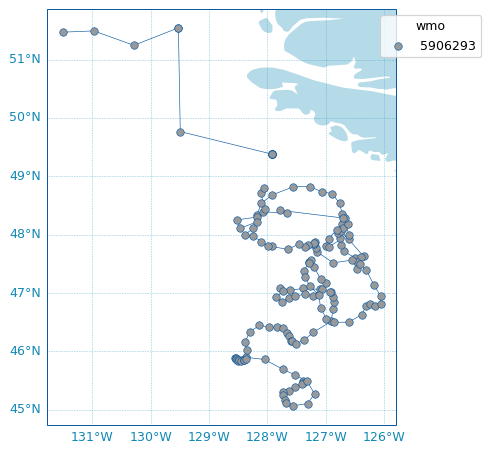

In [30]:
scatter_map(ds.index, set_global=False);

# Plot sections of time vs "variable"

We can visualise the data by plotting the variable of interest against time. You can see what variables are available by:

In [36]:
data = ds.data
data

<xarray.Dataset>
Dimensions:                          (N_POINTS: 84802)
Coordinates:
    LATITUDE                         (N_POINTS) float64 ...
    LONGITUDE                        (N_POINTS) float64 ...
    TIME                             (N_POINTS) datetime64[ns] 2020-08-13T03:...
  * N_POINTS                         (N_POINTS) int64 0 1 2 ... 84800 84801
Data variables: (12/54)
    BBP700                           (N_POINTS) float32 ...
    BBP700_ADJUSTED                  (N_POINTS) float32 ...
    BBP700_ADJUSTED_ERROR            (N_POINTS) float32 ...
    BBP700_ADJUSTED_QC               (N_POINTS) int32 0 0 1 0 0 1 ... 4 4 4 4 4
    BBP700_DATA_MODE                 (N_POINTS) <U1 'A' 'A' 'A' ... 'A' 'A' 'A'
    BBP700_QC                        (N_POINTS) int32 0 0 2 0 0 2 ... 4 4 4 4 4
    ...                               ...
    TEMP_ADJUSTED                    (N_POINTS) float32 ...
    TEMP_ADJUSTED_ERROR              (N_POINTS) float32 ...
    TEMP_ADJUSTED_QC                 (N_POINTS) int32 1 1 8 1 1 8 ... 1 1 1 1 1
    TEMP_DATA_MODE                   (N_POINTS) <U1 'D' 'D' 'D' ... 'D' 'D' 'D'
    TEMP_QC                          (N_POINTS) int32 1 1 8 1 1 8 ... 1 1 1 1 1
    TIME_QC                          (N_POINTS) int32 1 1 1 1 1 1 ... 1 1 1 1 1
Attributes:
    DATA_ID:              ARGO-BGC
    DOI:                  http://doi.org/10.17882/42182
    Fetched_from:         https://erddap.ifremer.fr/erddap
    Fetched_by:           jmneme
    Fetched_date:         2024/09/18
    Fetched_constraints:  WMO5906293
    Fetched_uri:          ['https://erddap.ifremer.fr/erddap/tabledap/ArgoFlo...

Let's start by plotting chlorophyll in the first 200m using the default plotting function from `argopy`:

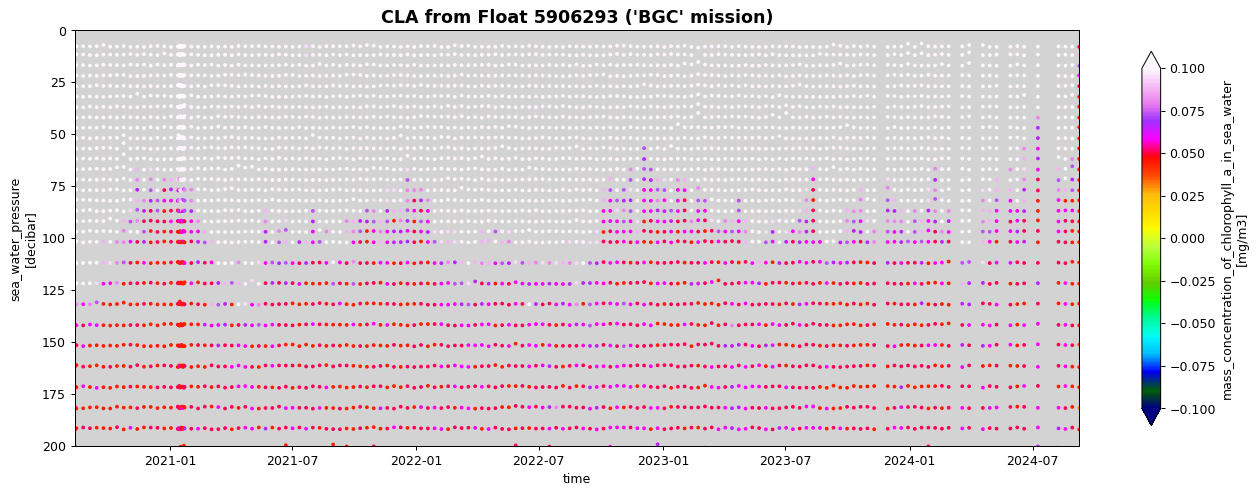

In [41]:
fig, ax = scatter_plot(data, 'CHLA')
ax.set_ylim(200, None)
ax.set_title("%s from Float %i ('%s' mission)" % ('CLA', argo_float_index, ds.mission), fontdict={'weight': 'bold', 'size': 14});

We can change the size of the markers, the extent of the colorbar and the colorbar itself:

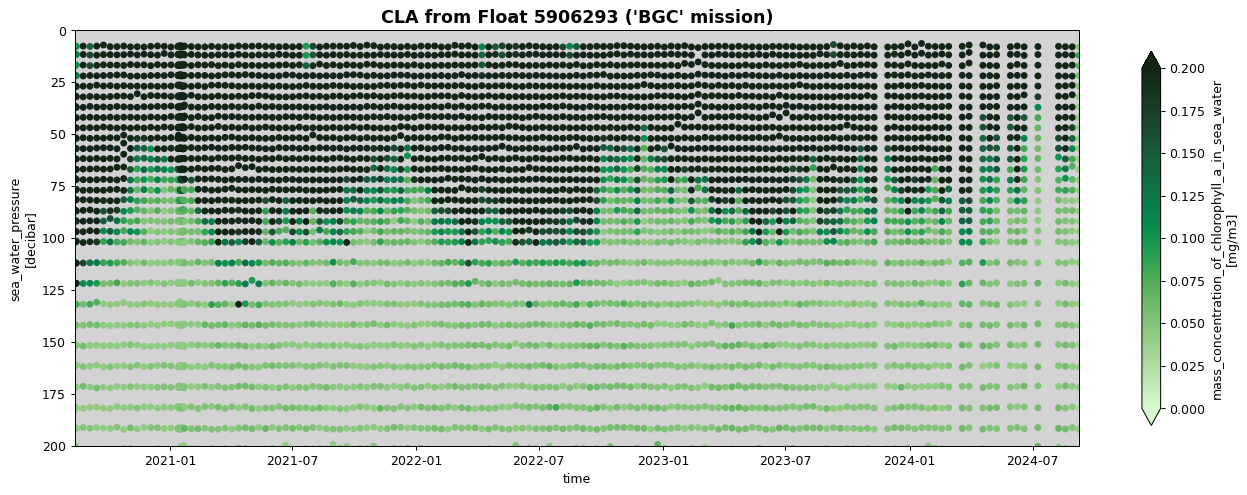

In [43]:
fig, ax = scatter_plot(data, 'CHLA', s = 20, vmin = 0, vmax = 0.2, cmap = cm.cm.algae)
ax.set_ylim(200, None)
ax.set_title("%s from Float %i ('%s' mission)" % ('CLA', argo_float_index, ds.mission), fontdict={'weight': 'bold', 'size': 14});

You can use similar approaches to plot any other variables. For example, temperature, salinity and nitrates:

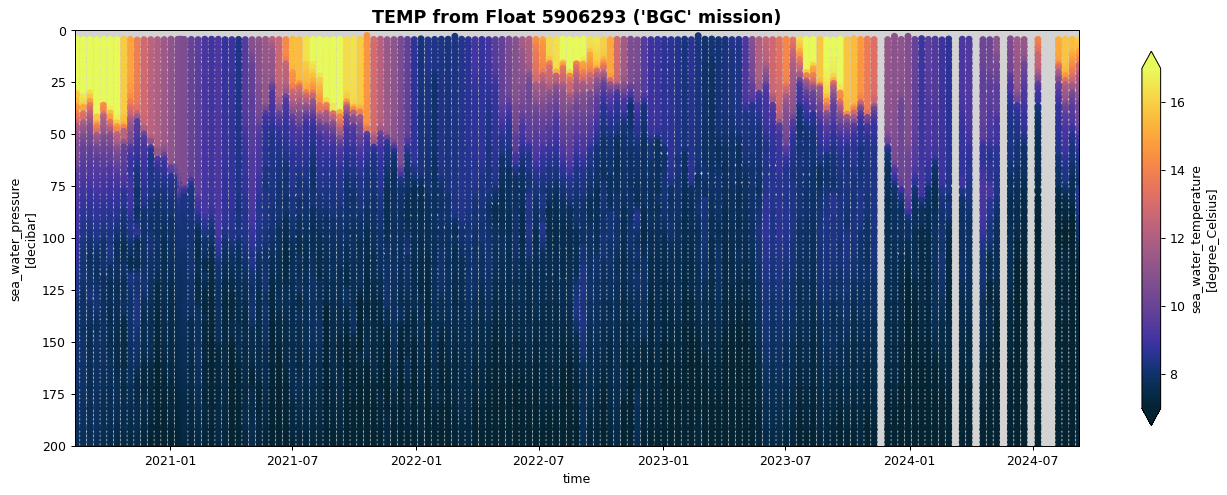

In [48]:
fig, ax = scatter_plot(data, 'TEMP', s = 20, vmin = 7, vmax = 17, cmap = cm.cm.thermal)
ax.set_ylim(200, None)
ax.set_title("%s from Float %i ('%s' mission)" % ('TEMP', argo_float_index, ds.mission), fontdict={'weight': 'bold', 'size': 14});

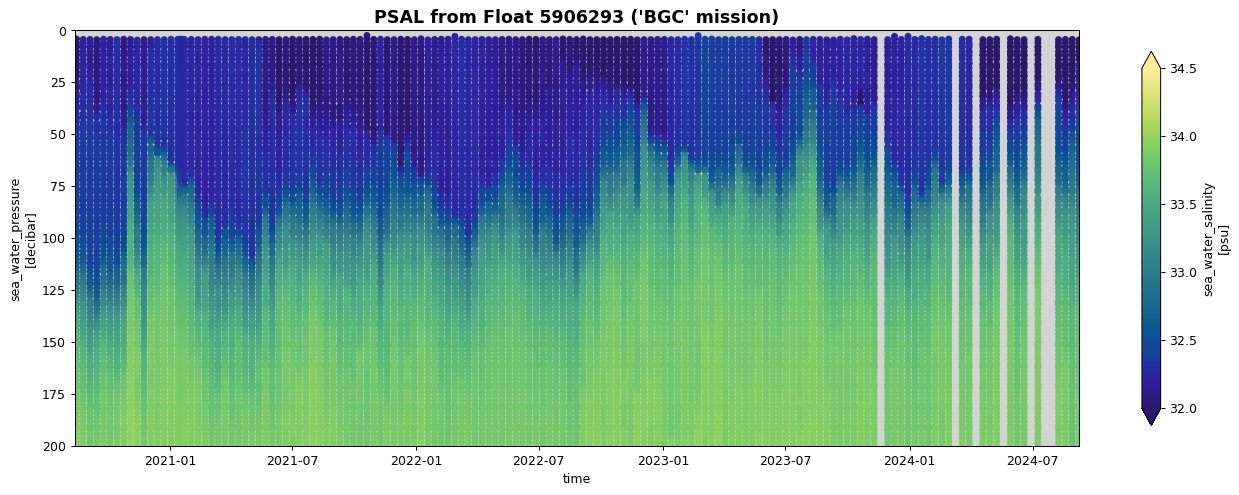

In [51]:
fig, ax = scatter_plot(data, 'PSAL', s = 20, vmin = 32, vmax = 34.5, cmap = cm.cm.haline)
ax.set_ylim(200, None)
ax.set_title("%s from Float %i ('%s' mission)" % ('PSAL', argo_float_index, ds.mission), fontdict={'weight': 'bold', 'size': 14});

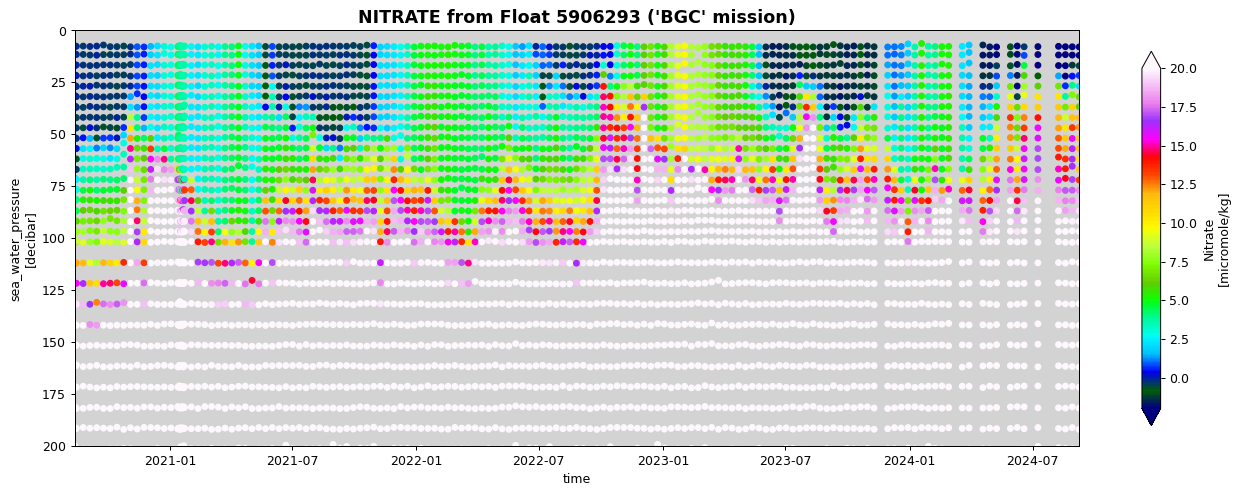

In [54]:
fig, ax = scatter_plot(data, 'NITRATE', s = 20, vmin = -2, vmax = 20)
ax.set_ylim(200, None)
ax.set_title("%s from Float %i ('%s' mission)" % ('NITRATE', argo_float_index, ds.mission), fontdict={'weight': 'bold', 'size': 14});